In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np
import matplotlib.pyplot as plt
from utils.getdata import get_data
from utils import simple_network, create_network, visualize_nn
from utils import get_nn_weight, set_nn_weight

from numpy.random import standard_normal as randn
from numpy.random import rand as rand
import torch
1+2+3

6

In [ ]:
from utils import draw_simple_neural_network


network = utils.simple_network(2, [8,8,1])
draw_simple_neural_network(network)

In [ ]:




# activationfunction=torch.nn.Sigmoid
# layers = [2, 4, 4, 2]
# network = utils.create_network(2, layers[1:])
# network





In [ ]:
from utils.create_network import simple_network


network = simple_network(2, [8,8,1])
network

In [ ]:
network[1].fc.bias.reshape(-1)

In [ ]:
network[1].fc.weight.reshape(-1)

In [ ]:
def get_nn_weight(network):
    sd = network.state_dict()
    weights = np.array([])
    for key, val in sd.items():
        weights = np.append(weights, val.reshape(-1).numpy())
    return weights

def set_nn_weight(network, weights):
    with torch.no_grad():
        sd = network.state_dict()
        idx = 0
        for key, val in sd.items():
            sd[key] = torch.tensor(weights[idx:idx+val.reshape(-1).shape[0]]).reshape(val.shape)
            idx += val.reshape(-1).shape[0]
        network.load_state_dict(sd)
    return network

w0 = get_nn_weight(network)
network.state_dict()




In [ ]:
w1 = np.ones_like(w0)
set_nn_weight(network, w1)
network.state_dict()



In [ ]:
set_nn_weight(network, w0)
network.state_dict()

In [ ]:
def get_nn_weightv0(network):
    weights = np.array([])
    for block in network:
        weights = np.append(weights, block.fc.weight.reshape(-1).detach().numpy())
        weights = np.append(weights, block.fc.bias.reshape(-1).detach().numpy())
    return weights

get_nn_weightv0(network)

In [ ]:
w1 = get_nn_weight(network)
len(w1)

In [ ]:
weights = w1
idx_weight = 0
for block in network:
    block.fc.weight

In [ ]:
for name, param in network.named_parameters():
    print(name, param.reshape(-1))

In [ ]:
for param in network.parameters():
    print(param.reshape(-1))

In [ ]:
# network[0].weight
network[1].__dict__


In [ ]:
network[1].__dict__

In [ ]:
sum(p.numel() for p in network.parameters())


In [ ]:
print([p.numel() for p in network.parameters()])

In [ ]:
'''
    Adobted from Math 467 Theory and Computational Methods for Optimization
    project1 by: Dr. Chunming Wang

    Translated from MATLAB to Python by: Zhihan Wang
'''


import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np
import matplotlib.pyplot as plt
from utils.getdata import get_data
from utils import simple_network, create_network, visualize_nn
from utils import get_nn_weight, set_nn_weight

from numpy.random import standard_normal as randn
from numpy.random import rand as rand
import torch


'''
Description: This is a script the performs a test of basic neural network
routines.
Usage: Experiment_Basic_NNTools(nTrials)
'''

def experiment_basic_nn_tools(n_trails = 1000):

    # Generate data and plot distribution
    x_data,y_data = get_data(100, 2, 1234567890)
    x_data = x_data.transpose()
    ind0 = np.where(y_data==0)[1]
    ind1 = np.where(y_data==1)[1]

    fig, ax = plt.subplots( figsize=(6,4) )
    ax.bar([0,1],[len(ind0),len(ind1)])
    ax.set_xticks([0,1])
    plt.show(block=False)

    # draw network graph
    network = create_network(2,[2,4,2])
    visualize_nn(network)


    # Initialize network using randomly generated weights.
    weight = get_nn_weight(network)
    weight = np.squeeze(0.01*randn([*weight.shape,n_trails]))
    rms = np.zeros((n_trails,1))
    for i in range(n_trails):
        network = set_nn_weight(network, weight[:,i])
        yVal = network(torch.tensor(x_data,dtype=torch.float32))
        rms[i] = np.sqrt(np.sum((y_data-yVal.detach().numpy())**2)/(n_trails-1))
    fig, ax = plt.subplots( figsize=(6,4) )
    ax.hist(rms,20)
    plt.show()
    return


experiment_basic_nn_tools()





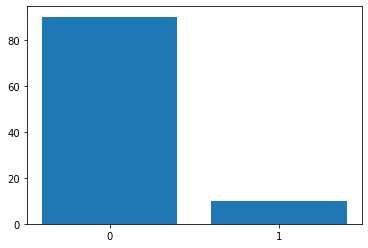

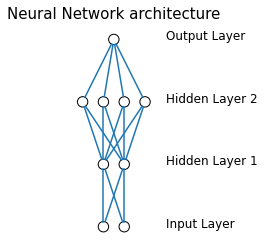

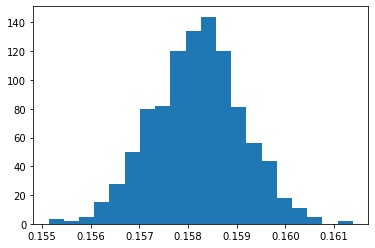

In [4]:
n_trails = 1000

# Generate data and plot distribution
x_data,y_data = get_data(100, 2, 1234567890)
x_data = x_data.transpose()
ind0 = np.where(y_data==0)[1]
ind1 = np.where(y_data==1)[1]

fig, ax = plt.subplots( figsize=(6,4) )
ax.bar([0,1],[len(ind0),len(ind1)])
ax.set_xticks([0,1])
plt.show(block=False)

# draw network graph
network = create_network(2,[2,4,1])
visualize_nn(network)


# Initialize network using randomly generated weights.
weight = get_nn_weight(network)
weight = np.squeeze(0.01*randn([*weight.shape,n_trails]))
rms = np.zeros((n_trails,1))
for i in range(n_trails):
    network = set_nn_weight(network, weight[:,i])
    yVal = network(torch.tensor(x_data,dtype=torch.float32))
    yVal = yVal.detach().numpy().transpose()
    rms[i] = np.sqrt(np.sum((y_data-yVal)**2)/(n_trails-1))
fig, ax = plt.subplots( figsize=(6,4) )
ax.hist(rms,20)
plt.show()



In [5]:
x_data.shape


(100, 2)

In [145]:
from importlib.metadata import requires


network = create_network(2,[4,4,2])
# visualize_nn(network)

weight = get_nn_weight(network)
weight = 0.01*randn(weight.shape)
network = set_nn_weight(network,weight)

# C = 11

# x1 = -1+2*np.arange(C)
# x2 = x1[:,np.newaxis]*np.ones((1,C))
# x1 = np.ones((C,1))*x1
# x_val = np.vstack((x1.reshape(1,-1),x2.reshape(1,-1)))
# x_val = x_val.transpose()
# print("x_val.shape = ",x_val.shape)

# y_val = network(torch.tensor(x_val,dtype=torch.float32))
# y_val = y_val.detach().numpy().transpose()
# print(y_val.shape)
# y1 = y_val[0,:].reshape(C,C)
# y2 = y_val[1,:].reshape(C,C)
# fig, ax = plt.subplots(1,2, figsize=(12,6))
# ax[0].imshow(y1, extent=[-10,10,-10,10])
# ax[0].set_xlabel('x_1')
# ax[0].set_ylabel('x_2')
# ax[0].set_title('y_1')
# ax[1].imshow(y2, extent=[-10,10,-10,10])
# ax[1].set_xlabel('x_1')
# ax[1].set_ylabel('x_2')
# ax[1].set_title('y_2')
# ax[1].yaxis.tick_right()
# ax[1].yaxis.set_label_position("right")
# plt.show(block=False)


from torch.autograd import grad 

network.train()
x_val = randn((100,2))
x_val = torch.tensor(x_val,dtype=torch.float32, requires_grad=True)

y_val = network(x_val)
print(x_val.shape)
y_grad = get_network_grad(network,x_val)
# y_grad = grad(outputs=y_val, inputs=x_val, grad_outputs=torch.ones_like(y_val))
# y_grad = y_grad[0].detach().numpy()

d_weight = 0.00001*randn(weight.shape)
network = set_nn_weight(network,weight+d_weight)
network.zero_grad()
y_val_new = network(x_val)

delta_y_val = y_val_new - y_val
delta_y_val = delta_y_val.detach().numpy()
ad_y_val = np.zeros(delta_y_val.shape)
print(ad_y_val.shape, delta_y_val.shape, y_grad.shape)

for k in range(delta_y_val.shape[0]):
    ad_y_val[k,:] = np.matmul(d_weight,y_grad[k,:])

relative_error = 100*(delta_y_val-ad_y_val)/delta_y_val
fig, ax = plt.subplots( figsize=(6,4) )
l = len(relative_error)
ax.plot(list(range(l)),relative_error,label='y_1')
# ax.plot(list(range(l)),relative_error[:,1],label='y_2')
ax.set_xlabel('Order of Input')
ax.set_ylabel('Relative Error in Output Variation (percent)')
plt.show(block=False)

ad_y_val.shape, delta_y_val.shape








torch.Size([100, 2])
(100, 2) (100, 2) torch.Size([100, 2, 42])


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 42)

In [ ]:
network

(100, 2) (100, 2) torch.Size([100, 2, 22])


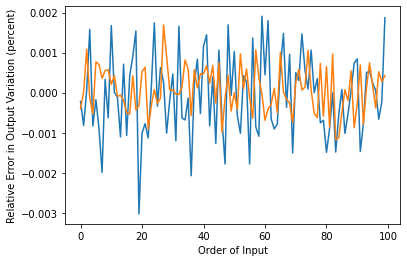

((100, 2), (100, 2))

In [330]:
from importlib.metadata import requires

network = create_network(2,[4,2])
weight = get_nn_weight(network)
weight = 0.01*randn(weight.shape)
network = set_nn_weight(network,weight)

from torch.autograd import grad 

network.train()
x_val = randn((100,2))
x_val = torch.tensor(x_val,dtype=torch.float32, requires_grad=True)

y_val = network(x_val)
network.zero_grad()
y_grad = get_network_grad(network,x_val)

# d_weight = 0.01*randn(weight.shape)*weight
d_weight = 0.01*randn(weight.shape)*0.001
network = set_nn_weight(network,weight+d_weight)
y_val_new = network(x_val)

delta_y_val = y_val_new - y_val
delta_y_val = delta_y_val.detach().numpy()
ad_y_val = np.zeros(delta_y_val.shape)
print(ad_y_val.shape, delta_y_val.shape, y_grad.shape)

for k in range(delta_y_val.shape[0]):
    ad_y_val[k,:] = np.matmul(y_grad[k,:,:],d_weight)

relative_error = (delta_y_val-ad_y_val)/delta_y_val
fig, ax = plt.subplots( figsize=(6,4) )
l = len(relative_error)
ax.plot(list(range(l)),relative_error,label='y_1')
# ax.plot(list(range(l)),relative_error[:,1],label='y_2')
ax.set_xlabel('Order of Input')
ax.set_ylabel('Relative Error in Output Variation (percent)')
plt.show(block=False)

ad_y_val.shape, delta_y_val.shape


In [287]:

a = randn((3,1))
b = randn((3,1))
a,b,a+b

(array([[-0.44970439],
        [-0.86077588],
        [-0.64784025]]),
 array([[ 1.29676697],
        [ 0.36610847],
        [-0.86330307]]),
 array([[ 0.84706258],
        [-0.49466741],
        [-1.51114332]]))

In [127]:
d_weight.shape, y_grad.shape

y_grad

((42,), torch.Size([100, 2, 42]))

In [223]:
def get_network_grad(network,x_val):
    grads = []
    y_val = network(x_val)
    for i in range(y_val.shape[0]):
        batch_grad = []
        for j in range(y_val.shape[1]):
            batch_param_grad = []
            y_val[i,j].backward(retain_graph=True)
            for param in network.parameters():
                batch_param_grad.append(param.grad.view(-1).clone().detach())
                param.grad.data.zero_()
            batch_grad.append(torch.cat(batch_param_grad))

        grads.append(torch.stack(batch_grad))
    return torch.stack(grads)

# def get_network_grad_one(network, x_val_i):
#     grads = []
#     y_val = network(x_val_i)
#     for i in y_val.shape[1]:

#     network(x_val).mean(dim=1).backward()
#     grads = []
#     for param in network.parameters():
#         grads.append(param.grad.view(-1))
#     grads = torch.cat(grads)
#     return grads

import torch.nn as nn
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Linear(1, 1)
)
w = get_nn_weight(model)
print(w)
w2 = 2*np.ones_like(w)
model = set_nn_weight(model, np.asarray([ 1.,  1.,  0., 1/2., 0. ]))
# model = set_nn_weight(model, np.asarray([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.]))
# model = set_nn_weight(model, get_nn_weight(model))
x = torch.tensor([[1,1],[1,3],[3,3]], dtype=torch.float32)
grads = get_network_grad(model, x)


grads






[ 0.20613569 -0.50939083 -0.00354767 -0.49197626 -0.62250495]


tensor([[[0.5000, 0.5000, 0.5000, 2.0000, 1.0000]],

        [[0.5000, 1.5000, 0.5000, 4.0000, 1.0000]],

        [[1.5000, 1.5000, 0.5000, 6.0000, 1.0000]]])

RuntimeError: grad can be implicitly created only for scalar outputs

In [85]:
torch.tensor(model.parameters())



RuntimeError: Could not infer dtype of generator

In [ ]:
x

In [65]:
network = create_network(2,[4,4,2])
weight = get_nn_weight(network)
y_val = network(torch.tensor(x_val,dtype=torch.float32))

# y_grad = grad(outputs=y_val, inputs=x_val, grad_outputs=torch.ones_like(y_val), retain_graph=True)


external_grad = torch.tensor([1., 1.])
network.backward(gradient=external_grad)

print(network.network[0].fc.weight.grad)


/var/folders/v2/pb99vmxs1tq5lz_90qs787rm0000gn/T/ipykernel_28421/2868340565.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_val = network(torch.tensor(x_val,dtype=torch.float32))


AttributeError: 'simple_network' object has no attribute 'backward'